# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************

# 제 4 강: 퍼셉트론 3 

## 학습 목표
    - 퍼셉트론 알고리즘을 이해한다.
    
## 학습 내용
    - 퍼셉트론 알고리즘
    - 퍼셉트론 가중치 계산 
    - 퍼셉트론 학습 전체 과정
    - 퍼셉트론 알고리즘의 한계
    - 퍼셉트론 예제

## 1. 퍼셉트론 알고리즘

퍼셉트론 알고리즘을 도식화하면 다음과 같이 요약할 수 있습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/PerceptronAlgorithm.png?raw=true" width="500">
<center>그림 1: 퍼셉트론 알고리즘</center>

### 1-1. 알고리즘

우리가 구하고자 하는 것은 입력값 $x$들을 분류해 낼 수 있는 가중치 $w$인데, 로젠블라트가 처음 제안한 학습 알고리즘은 다음과 같이 요약할 수 있습니다.  
1. 가중치를 0 혹은 무작위 작은 수로 초기화 한다. 
2. 각 학습 자료$^{Training \ Sample}$  $x^{(i)}$에 대해 다음을 실행한다. 
   - 출력 $\hat{y}$를 계산한다.    즉 $\hat{y} = h(\mathbf{w^Tx})$
   - 가중치$w_j$를 조정한다. 즉 $w_j := w_j + \Delta w_j$
   
$x^{(i)}$ 에서 윗첨자 $(i)$는 입력되는 여러 학습자료에 하나씩 번호를 붙인 것입니다. 따라서 학습자료는 각각 $x^{(1)}, x^{(2)}$, ...이 됩니다.  $\hat{y}$ 는 y hat(햇)으로 읽으며, 퍼셉트론이 계산한, 즉 퍼셉트론이 예측한$^{predicted}$ 예측값입니다.  $y$는 실제값 혹은 클래스 레이블(True Class Label)이라고 하며, 명시적인 정답을 말합니다. 실제값 혹은 클래스 레이블은 입력된 해당 학습자료가 출력해야 할 이미 알려진 참 값을 말합니다. $\Delta$는 delta$^{델타}$라고 읽으며, 수학에서 "차이" 혹은 "작은 값"을 표시할 때 흔히 사용합니다. 기호 $:=$는 등호(=)가 아니며, 오른쪽 항을 계산하여 왼쪽 항에 설정(Assignment)한다는 개념입니다. 

### 1-2. 가중치 계산

각 학습자료에 따라 계산을 하면서, 가중치를 조정하는 값은 다음의 방법을 따릅니다.  

\begin{align}
   \Delta w_j= \eta (y^{(i)} - \hat{y}^{(i)})x_j^{(i)}   \tag{1} 
\end{align}
   
여기서 $\eta^{에타}$는 __학습률__을 나타내며 대개 0부터 1.0 사이의 상수입니다. 식(1)을 2차원의 예를 들어 각각의 경우를 풀어서 표기하면 다음과 같습니다. 여기서 주의할 것은 가중치를 조정할 때, 모든 값($w_0$, $w_1$, ..., $w_n$)을 동시에 조정해야 한다는 것입니다. 

\begin{align}
   \Delta w_0 &= \eta (y^{(i)} - \hat{y}^{(i)})   \\
   \Delta w_1 &= \eta (y^{(i)} - \hat{y}^{(i)})x_1^{(i)}  \\   
   \Delta w_2 &= \eta (y^{(i)} - \hat{y}^{(i)})x_2^{(i)}   
\end{align}

우리가 퍼셉트론 예제를 다루기 전에 식(1)의 의미를 살펴보면 좋겠습니다. 식(1)을 관찰해보면, 예측값과 실제값(클래스 레이블)의 차이에 입력과 학습률을 곱한 값만큼 가중치를 조정하는 것입니다. 이것이 퍼셉트론 학습원칙의 핵심입니다. 

이 원칙이 어떻게 지켜지는지 간단한 테스트를 해봅시다. 활성화 함수 $h$가 양극성 계단 함수로, 1또는 -1만 반환한다고 해봅시다.


실제값 y와 예측값 $\hat{y}$이 같은 경우(다 같이1 혹은 다 같이 -1)를 식(1)에 대입하면, $\Delta{w_j}$는 0가 되므로, $w_j$는 조정되지 않습니다.  

\begin{align}
   \Delta w_j &= \eta (1^{(i)} - 1^{(i)})x_j^{(i)} = 0  \\
   \Delta w_j &= \eta (-1^{(i)} - (-1^{(i)}))x_j^{(i)} = 0 
\end{align}

반면에, 클래스 레이블(참값) y와  예측한 값 $\hat{y}$이 서로 다를 경우(하나는 1, 다른 하나는 -1)를 식(1)에 대입하면, $\Delta{w_j}$는 0이 아니므로, $w_j$는 다음과 같이 커지거나 작아지도록 조정이 될 것입니다.  
 
 \begin{align}
   \Delta w_j &= \eta (1^{(i)} - (-1^{(i)}))x_j^{(i)} = \eta (2)x_j^{(i)} \\
   \Delta w_j &= \eta (-1^{(i)} - 1^{(i)})x_j^{(i)} = \eta (-2)x_j^{(i)} \\
\end{align}

__예제 1__: 학습을 통해 다음의 가중치 $w$ 가 학습되었고, 예측값 $\hat{y}$와 클래스 레이블(참값) $y$ 가 주어졌다고 가정합시다. 몇 번째 샘플의 가중치가 조정될까요?

- $\mathbf{\hat{y}} = (\hat{y_1}, \hat{y_2}, \hat{y_3}, \hat{y_4}, \hat{y_5}) = (1, -1, 1, 1, -1)$ 
- $\mathbf{y} = ({y_1}, {y_2}, {y_3}, {y_4}, {y_5}) = (1, -1, -1, 1, -1)$ 
- $(x_1, x_2) = (0, 1)$

```
(1) 1
(2) 2
(3) 3
(4) 4
(5) 5
```

__예제풀이__: (3)
\begin{align}   
    {y_1} - \hat{y}_1 = 0\\
    {y_2} - \hat{y}_2 = 0\\
    {y_3} - \hat{y}_3 = 2\\
    {y_4} - \hat{y}_4 = 0\\
    {y_5} - \hat{y}_5 = 0\\
\end{align}



## 2. 퍼셉트론 전체 학습 과정

퍼셉트론이 만들어지기 까지의 전체 과정을 요약하면 다음과 같습니다.
1. 학습 자료들을 입력받는다.
2. 각각이 학습 자료 안에 있는 데이터($x$)를 초기 가중치($w$)와 곱한 값($z$)을 구한다.
3. 2에서 구한 값을 활성화 함수(예를 들어 양극성 계단 함수)에 넣어 예측 값($\hat{y}$)를 구한다.
4. 예측값과 실제값을 비교하여 새로운 가중치 값($\Delta{w}$)을 만든다.
5. 새로운 가중치 값($w$=$w$+$\Delta{w}$)과 다음 학습 자료 안에 있는 데이터를 곱한 값($z$)을 구한다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/Perceptron-process.png?raw=true" width=600></img>
<center>그림 2: 퍼셉트론 알고리즘의 전체 과정</center>

퍼셉트론이 비록 70년 이상된 알고리즘이나,두 클래스가 선형으로 분류 가능하다면  이 알고리즘은 하나의 퍼셉트론으로도 가중치를 찾을 수 있도록 멋지게 수렴합니다.

## 3. 퍼셉트론 알고리즘의 한계

### 3-1. 배타적논리합$^{XOR}$
1957년 코넬 항공 연구소의 프랭크 로젠블랏트가 퍼셉트론 알고리즘을 발표하고 실제로 실행하는 컴퓨터(기계?)를 제작했을때, 뉴욕타임즈는 가까운 미래에 말하고, 생각하고, 걸을 수 있는 컴퓨터의 세상이 도래할 것이라는 미래 예측 기사를 냈습니다.  그러나 1969년, 퍼셉트론으로는 배타적논리합$^{XOR}$ 문제도 풀 수 없다는 사실을 MIT 미디어 랩의 창시자이며, 인공지능의 아버지라고 불리는 마빈 민스키$^{Marvin \ Minsky}$교수가 증명하였습니다.  다만, 다층 퍼셉트론(MLP: Multi-Layer Perceptron)을 학습시킬 수 있다면, XOR문제를 풀 수 있지만, 그 방법이 없다고 했습니다.  그런데, 1974년, 당시 하버드 대학의 박사과정 학생이었던 펄 워보스가 최초로 MLP를 학습시킬 수 있는 오류 역전파(Backpropagation)을 발표하면서, 기계학습은 새로운 전기를 맞게 되었습니다.  이 알고리즘에 대해서 우리도 곧 다룰 것입니다. 기대하십시오. 

배타적논리합의 경우, 두 입력값이 같으면 0이며 두 입력값이 다를 경우 1을 반환해야 합니다. 두 입력값의 경우를 그래프로 나타내보면 아래 왼쪽 그림과 같이 나타납니다. 그러나 해당 그래프는 선형적으로 분류될 수 없음을 볼 수 있습니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/XORClassifier3.png?raw=true" width="400"></img>
<center>그림 3: 퍼셉트론 알고리즘의 한계 (베타적논리합)</center>

퍼셉트론 알고리즘을 실행할 때, 입력되는 학습자료가 선형으로 분류 가능하지 않을 수 있으므로, 오차의 한계를 설정하거나 학습의 최대 반복 횟수(에포크$^{epoch}$)를 미리 정하는 것이 좋습니다. 그렇지 않다면 퍼셉트론 알고리즘은 영원히 반복되며, 가중치를 이상한 방향으로 학습해 나갈 것입니다.

### 3-2. 최적화된 가중치

또 한가지 퍼셉트론의 한계는 아래 왼쪽 그림과 같이 두 클래스를 분류한다고 할 때 퍼셉트론 알고리즘은 두 직선에 사이 존재하는 하나의 직선으로 수렴하지만, 두 직선 사이에 존재하는 최적의 직선을 선택할 수는 없습니다. 오른쪽 그림과 같이 하나의 새로운 값이 들어온다고 했을 때, 이 입력 값을 분류하기 위해서는 또 새로운 직선이 만들어지기 때문이지요. 따라서 어떠한 직선이 모든 입력을 구분하는 최적의 직선이라고 퍼셉트론은 말할 수 없습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/Limit_Perceptron.png?raw=true" width="400">
<center>그림 4: 퍼셉트론 분류기의 한계</center>

퍼셉트론을 계속 학습하여, 가중치를 변화시키더라도, 어떤 가중치 값들이 가장 이상적으로 모든 값(학습 데이터와 새로운 데이터)들을 분류해는지 알 수 없습니다. 실제 새로운 데이터를 넣어보기 전까지는 퍼셉트론은 학습된 데이터에 한해, 분류를 할 수 있다 없다만 알려줄 뿐입니다. 

## 4. 퍼셉트론 예제
이제 위에서 배운 퍼셉트론을 갖고 실제로 퍼셉트론을 만들고 학습 자료를 구분해보도록 합시다.

그림 4-1과 같이 6개의 학습(훈련) 자료가 주어졌다고 가정하면, $x^{(1)} = (1, 1)$, $x^{(2)} = (2, -2)$, $x^{(3)} = (-1, -1.5)$, $x^{(4)} = (-2, -1)$, $x^{(5)} = (-2, 1)$, $x^{(6)} = (1.5, 0.5)$ 이라고 표기할 수 있습니다. 

각 자료의 클래스 레이블은 $y = [1, -1, -1, -1, 1, 1]$입니다. 학습 자료들을 사용하여 이진 페셉트론을 학습시키고, 학습 자료들을 이진 분류할 수 있는 가중치를 구하고, 그림 4-2와 같이 시각화하는 것이 목표입니다. 

<table>
<tr>
    <td><img src='https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/perceptronExample1.png?raw=true' width="400"> 
        <center> 그림 5-1: 퍼셉트론 예제 1</center> </td>
    <td><img src='https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/perceptronExample1Result_7.png?raw=true' width="400"> 
        <center> 그림 5-2: 퍼셉트론 예제 1 결과($\eta=0.1$)</center></td>
</tr>
</table>

### Step 1

이진 퍼셉트론의 가중치$\mathbf{w}$를 구하는 계산을 직접 손으로 계산하면서 아래 표를 완성해 봅시다. 단, 초기 가중치는 계산의 편의를 위하여 $\mathbf{w^T} = [0 \ \ 1 \ \ 0.5]$으로 설정합니다.  학습률은 $\eta = 0.1$, 학습자료는 1번 즉 $\mathbf{x}^{(1)}= [1, 1]$부터 차례로 입력합니다. 

표에 나온 값은 $\mathbf{x}^{(1)}= [1, 1]$에 bias 까지 추가한 상태입니다. 즉, bias를 b로 나타내지 않고 $w_0$$x_0$으로 나타낸 것입니다. 위에서 가중치 백터의 첫번 째 값이 0이므로 $w_0$를 0으로, $x_0$를 1로 둔 것으로 생각하면 됩니다.

                                      표 1: 각 학습 자료의 입력에 따른 가중치 계산 과정 

| $i$   |$x_0^{(i)},x_1^{(i)},x_2^{(i)}$|$w_0, w_1, w_2$| $\mathbf{w^Tx}$ | $\hat{y}^{(i)}$| $y^{(i)}$ |$\eta$ |$\Delta w$ |
| ----  |    ---         |  --  |:---------------:|:----------------:|:----------:|:------------:|:-----------:|
|  1    |  (1.0, 1.0, 1.0)  |(0.0, 1.0, 0.5) | $\hspace{60pt}$ |  $\hspace{30pt}$ |     1        |  0.1    | $\hspace{60pt}$ 
|  2    |  (1.0, 2.0, -2.0) |$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$   |    -1        |  0.1   |$\hspace{60pt}$ 
|  3    |  (1.0, -1.0,-1.5) |$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$   |    -1        |  0.1   |$\hspace{60pt}$ 
|  4    |  (1.0, -2.0, -1.0)|$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$   |    -1        |  0.1   |$\hspace{60pt}$ 
|  5    |  (1.0, -2.0, 1.0) |$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$   |     1        |  0.1   |$\hspace{60pt}$ 
|  6    |  (1.0, 1.5, -0.5) |$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$   |     1        |  0.1   |$\hspace{60pt}$ 
| final | $\hspace{60pt}$      |        - -      |    -- -      |  - -    |      -        |       


첫 번째로 $i$가 1일 경우, $\Delta w$의 값을 구해보도록 합시다.

$x^{(1)}$ = (1.0, 1.0, 1.0) 이고, $w^{T}$값은 (0.0, 1.0, 0.5)이므로 두 벡터의 내적 값 $\mathbf{w^Tx}$ 은 (1.0 $\times$ 0.0) + (1.0 $\times$ 1.0) + (1.0 $\times$ 0.5) = 1.5가 됩니다.

활성화 함수가 양극성 계단 함수라고 할 때, 1.5는 1로 변환됩니다. 따라서  $\hat{y}^{(1)}$의 값은 1이 됩니다. 
기댓값 $\hat{y}^{(1)}$과 실제값 $y$의 값이 같기 때문에 $\Delta w$ = 0.1$\times$(1 - 1) = 0 이 됩니다. 

첫 번째 입력 값은 가중치를 변화시키지 못했습니다. 이때 착각해서는 안되는 점은, 가중치가 변하지 않았다고 하여, 해당 입력 값이 쓸모 없는 것은 절대로 아닙니다. 가중치가 변하지 않았다는 것은 현재 가중치로 입력 값을 잘 분류할 수 있다는 뜻을 입증하는 근거가 되기 때문이지요.

퍼셉트론이 첫 번째 학습한 후, 표에 채워지는 내용은 다음과 같습니다. 

                                      표 1-1: 각 학습 자료의 입력에 따른 가중치 계산 과정 

| $i$    |  $x^{(i)}$       |  $ w $         | $\mathbf{w^Tx}$ | $\hat{y}^{(i)}$ | $y^{(i)}$ |  $\eta$ |$\Delta w$ |
|:------:|:----------------:|:--------------:|:---------------:|:---------------:|:----------:|:--------:|:-----------:|
|  1     | (1.0, 1.0, 1.0)  |(0.0, 1.0, 0.5) | 1.5             |           1     |     1      |  0.1    | (0.0, 0.0, 0.0)
|  2     | (1.0, 2.0, -2.0) |$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$  |    -1      |  0.1   |$\hspace{60pt}$ 
|  3     | (1.0, -1.0,-1.5) |$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$  |    -1      |  0.1   |$\hspace{60pt}$ 
|  4     | (1.0, -2.0, -1.0)|$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$  |    -1      |  0.1   |$\hspace{60pt}$ 
|  5     | (1.0, -2.0, 1.0) |$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$  |     1      |  0.1   |$\hspace{60pt}$ 
|  6     | (1.0, 1.5, -0.5) |$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$  |     1      |  0.1   |$\hspace{60pt}$ 
| final  |    -             | $\hspace{60pt}$|       -         |        ---      |    - -     |    -    |      -        |       

두 번째로 $i$가 2일 경우, $\Delta w$의 값을 구해보도록 합시다.

$x^{(2)}$ = (1.0, 2.0, -2.0) 이고, $w^{T}$값은 첫 번째 경우에서 변하지 않았기 때문에 (0.0, 1.0, 0.5)입니다. 두 벡터의 내적 값 $\mathbf{w^Tx}$ 은 (1.0 $\times$ 0.0) + (2.0 $\times$ 1.0) + (-2.0 $\times$ 0.5) = 1가 됩니다.

활성화 함수가 양극성 계단 함수라고 할 때, 1은 1로 변환됩니다. 따라서  $\hat{y}^{(1)}$의 값은 1이 됩니다. 
기댓값 $\hat{y}^{(1)}$과 실제값 $y$의 값과 다르기 때문에 $\Delta w$ = 0.1$\times$(-1 - 1) = -0.2 이 됩니다. 

이제 가중치 값을 변화시킬 차례입니다. 

\begin{align}
   \Delta w_j= \eta (y^{(i)} - \hat{y}^{(i)})x_j^{(i)}   \tag{1} 
\end{align}

이기 때문에, $x^{(2)}$의 원소들의 값에 -0.2를 곱하면 (-0.2, -0.4, 0.4)가 됩니다.

퍼셉트론이 두 번째 학습한 후, 표에 채워지는 내용은 다음과 같습니다.

                                      표 1-1: 각 학습 자료의 입력에 따른 가중치 계산 과정 

| $i$   |  $x^{(i)}$       |  $ w $           | $\mathbf{w^Tx}$ | $\hat{y}^{(i)}$ | $y^{(i)}$ |  $\eta$ |$\Delta w$ |
|:------:|:-----------------:|:--------------:|:---------------:|:---------------:|:----------:|:--------:|:-----------:|
|  1     |  (1.0, 1.0, 1.0)  |(0.0, 1.0, 0.5) | 1.5             |       1         |     1        |  0.1   | (0.0, 0.0, 0.0)
|  2     |  (1.0, 2.0, -2.0) | (0.0, 1.0, 0.5)| 1               |       1         |    -1        |  0.1   | (-0.2, -0.4, 0.4) 
|  3     |  (1.0, -1.0,-1.5) |$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$  |   -1        |  0.1   |$\hspace{60pt}$ 
|  4     |  (1.0, -2.0, -1.0)|$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$  |    -1        |  0.1   |$\hspace{60pt}$ 
|  5     |  (1.0, -2.0, 1.0) |$\hspace{60pt}$  | $\hspace{60pt}$ |$\hspace{60pt}$ |     1        |  0.1   |$\hspace{60pt}$ 
|  6     |  (1.0, 1.5, -0.5) |$\hspace{60pt}$ | $\hspace{60pt}$ |$\hspace{60pt}$  |     1        |  0.1   |$\hspace{60pt}$ 
| final  |     -             | $\hspace{60pt}$ |       -         |     -   -      |     -  -     |    -    |      -        |       

여섯 번째까지 학습한 후에 표에 채워지는 내용은 다음과 같습니다. ($\mathbf{w^Tx}$와 $w$ 빈칸들을 채워보십시오)


| $i$  | $x^{(i)}$       |  $ w $         | $\mathbf{w^Tx}$| $\hat{y}^{(i)}$| $y^{(i)}$| $\eta$ | $\Delta w$
|:----:|:---------------:|:--------------:|:--------------:|:--------------:|:--------:|:------:|:----------:|
|  1   |(1.0, 1.0, 1.0)  | (0.0, 1.0, 0.5)|  1.5           |        1       |     1    |   0.1  |     0
|  2   |(1.0, 2.0, -2.0) | (0.0, 1.0, 0.5)|  1.0           |        1       |    -1    |   0.1  | (-0.2,-0.4,0.4) 
|  3   |(1.0, -1.0,-1.5) |(-0.2, 0.6, 0.9)|$\hspace{60pt}$ |       -1       |    -1    |   0.1  |   0
|  4   |(1.0, -2.0, -1.0)|(-0.2, 0.6, 0.9)|$\hspace{60pt}$ |       -1       |    -1    |   0.1  |   0
|  5   |(1.0, -2.0, 1.0) |$\hspace{60pt}$ |  -0.5          |       -1       |     1    |  0.1   | (0.2, -0.4, 0.2)
|  6   |(1.0, 1.5, -0.5) |$\hspace{60pt}$ |  -0.25         |       -1       |     1    |  0.1   | (0.2, 0.3, -0.1)   
| final|   -             |(0.2, 0.5, 1.0) |$\hspace{60pt}$ |   -   - |  -    -   |   -    |  $\hspace{60pt}$  

### Step 2  최종의 가중치로부터 판별식을 구하십시오. 

여기서는 우리가 _Step 1_에서 산출한 가중치을 다음 공식에 대입하여 판별식을 $x_2$에 관한 식으로 구합니다. 가중치로부터 학습 자료들을 두 클래스로 나누는 판별식$^{decision \ boundary}$은 $\mathbf{w^Tx} = 0$입니다.  우리가 산출한 가중치 `w = [0.2, 0.5, 1.0]` 입니다. 그러므로, 

\begin{align}
  \mathbf{w^Tx} &= 0  \\
\begin{bmatrix}
w_0&w_1&w_2\\
\end{bmatrix}
\begin{bmatrix}
1 \\ x_1 \\ x_2
\end{bmatrix} &= 0 \\
  w_0 + w_1x_1 + w_2x_2 &= 0  \\
  0.2 + 0.5x_1 + 1.0x_2 &= 0  \\
  x_2 &= -0.5x - 0.2
\end{align}



### Step 3 퍼셉트론 학습 자료와 판별식의 시각화 

학습 자료와 손으로 판별식을 시각화하여 결과를 확인하는 작업을 하고자 합니다. 

우리가 __Step 1__에서 시작할 때, 임의로 시작한 가중치 $w(0, 1.0, 0.5)$의 판별식을 시각화하고 또한 페셉트론으로 학습하여 산출한 최종의 가중치 $w(0.2, 0.5, 1.0)$ 판별식을 `joy.plot_xyw()` 함수를 호출하여 시각화합니다.

`joy`는 본 강의를 위해 개발한 다양한 함수들을 모아둔 모듈입니다.  `joy.plot_xyw()` 함수에서 요구하는 $X$는 학습(훈련) 자료들이며, $y$는 각 학습 자료의 클래스 레이블입니다. $w$는 선택적 인자이며, 학습 자료를 이진 분류할 수 있는 가중치 즉 판별식입니다. `annotate`는 각 학습 자료들 일련 번호 표시 여부를 말합니다. 그림을 저장하길 원한다면 `savefig`에 파일 이름을 설정할 수 있습니다.   

<table> <tr>
    <td><img src='https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/perceptronExample1Result_1.png?raw=true' width="400"> 
        <center> 그림 6-1: 퍼셉트론 예제 1의 입력 자료와 최초의 가중치에 따른 판별식 </center> </td>
    <td><img src='https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/perceptronExample1Result_7.png?raw=true' width="400"> 
        <center> 그림 6-2: 퍼셉트론 예제 1의 입력 자료와 최종의 가중치에 판별식 ($\eta=0.1$)</center></td>
</tr> </table>


#### 입력 자료의 시각화(1)
아래 코드를 한 줄 씩 설명하자면, 
- `x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0,-1.5], [-2.0, -1.0], [-2.0,1.0], [1.5, -0.5]]) ` : bias를 뺀 x값을 배열로 나타낸 코드입니다.
- `X = np.c_[ np.ones(len(x)), x ]` : bias값으로 1.0을 넣어주는 코드입니다.
- `y = np.array([1, -1, -1, -1, 1, 1])` : 각 데이터들의 라벨을 결정해주는 코드입니다.
- `plot_xyw(X, y, X0=True, annotate=True)` : 학습 자료를 시각화 하기 위한 함수를 부르는 코드입니다.
- `plot_xyw(X, y, w, X0=True, annotate=True)` : 가중치 w를 추가하면 판별식을 도식화 합니다. 

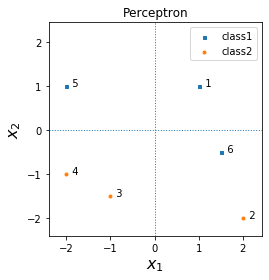

In [1]:
import joy              # local library
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

# x: bias가 없는 순수한 input samples [(x_1, x_2), ...]
x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0,-1.5], [-2.0, -1.0], [-2.0,1.0], [1.5, -0.5]])

# X: bias를 포함한 input samples (1, x_1, x_2), ...
X = np.c_[ np.ones(len(x)), x ]

# y: class labels for input samples 
y = np.array([1, -1, -1, -1, 1, 1])

# w: initial random weights [0.0, 1.0, 0.5], final weights [0.2, 0.5, 1.0]
w = np.array([0.0, 1.0, 0.5])

joy.plot_xyw(X, y, X0=True, annotate=True)

#### 입력 자료와 초기 판별식의 시각화 (2)

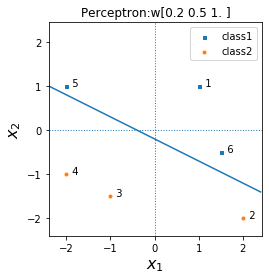

In [2]:
w = np.array([0.2, 0.5, 1.0])
joy.plot_xyw(X, y, w, X0=True, annotate=True)

#### 입력 자료와 최종 판별식의 시각화 (3)

In [ ]:
w = None
joy.plot_xyw(X, y, w, X0=True, annotate=True)

저희가 구한 마지막 가중치 값이 확실하게 입력 데이터을 분류하는 것을 그래프로 확인할 수 있습니다. 

추가로, 위에서 보여드린 `plot_xyw` 함수를 사용해서 각 단계마다 가중치의 변화, 즉 결정 경계가 어떻게 변화하는지 그려보았습니다. 다음 반복 횟수가 많아지면 많아질 수록, 가중치(w)값의 변화와 더불어 입력 값을 더 정확하게 분류하는 것을 아래의 표시된 4 개의 그래프로 확인할 수 있습니다. 

결론적으로, 이렇게 간단한 알고리즘으로 6개의 입력값을 완벽하게 분류하는 경계선을 찾아냈습니다. 

<table> <tr>
    <td><img src='https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/perceptronExample1Result_2.png?raw=true' width="175"> 
    <td><img src='https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/perceptronExample1Result_3.png?raw=true' width="175"> 
    <td><img src='https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/perceptronExample1Result_4.png?raw=true' width="175"> 
    <td><img src='https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/perceptronExample1Result_5.png?raw=true' width="175"> 
    <td><img src='https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/perceptronExample1Result_6.png?raw=true' width="175"> 
</tr> </table>
<center> 그림 7-1: 가중치 변화에 따른 판별식들 </center> </td>

### Step 4. Chekcing it by code

지금까지 손으로 계산한 퍼셉트론 알고리즘 예제를 코딩으로 구현하여 결과를 비교하고자 합니다. 퍼셉트론 알고리즘을 표현한 아래 그림과 또한 손으로 계산 값들을 보면서 아래 코드를 완성하십시오. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/Perceptron-process.png?raw=true" width=600></img>
<center>그림 2: 퍼셉트론 알고리즘의 전체 과정</center>



| $i$   |  $x^{(i)}$       |  $ w $            | $\mathbf{w^Tx}$ | $\hat{y}^{(i)}$  | $y^{(i)}$ | $\eta$ | $\Delta w$
|:------:|:-----------------:|:---------------:|:---------------:|:----------------:|:----------:|:--------:|:-------------:|
|  1     |  (1.0, 1.0, 1.0)  | (0.0, 1.0, 0.5)  |  1.5            |        1         |     1        |   0.1   |     0
|  2     |  (1.0, 2.0, -2.0) | (0.0, 1.0, 0.5)  |  1.0            |        1         |    -1        |   0.1  | (-0.2,-0.4,0.4) 
|  3     |  (1.0, -1.0,-1.5) |(-0.2, 0.6, 0.9)  |   -2.15         |       -1         |    -1        |   0.1  |   0
|  4     |  (1.0, -2.0, -1.0)|(-0.2, 0.6, 0.9)  |   -2.3          |       -1          |    -1        |  0.1  |   0
|  5     |  (1.0, -2.0, 1.0) |(-0.2, 0.6, 0.9)  |   -0.5          |       -1          |     1        | 0.1   | (0.2, -0.4, 0.2)
|  6     |  (1.0, 1.5, -0.5) | (0.0, 0.2, 1.1)  |   -0.25         |       -1          |     1        | 0.1   | (0.2, 0.3, -0.1)   
| final  |     -             | (0.2, 0.5, 1.0) |  $\hspace{60pt}$ |       -         |        -        |   -    |     $\hspace{60pt}$  

알고리즘을 구현하고 샘플들을 입력하여 아래와 같은 과정으로 판별식을 구하고 시각화하기를 원합니다. 

```
1 z=1.5, 	 y:1, yhat:1, delta[0. 0. 0.], w:[0.  1.  0.5]
2 z=1.0, 	 y:-1, yhat:1, delta[-0.2 -0.4  0.4], w:[-0.2  0.6  0.9]
3 z=-2.15, 	 y:-1, yhat:-1, delta[ 0. -0. -0.], w:[-0.2  0.6  0.9]
4 z=-2.3, 	 y:-1, yhat:-1, delta[ 0. -0. -0.], w:[-0.2  0.6  0.9]
5 z=-0.5, 	 y:1, yhat:-1, delta[ 0.2 -0.4  0.2], w:[0.  0.2 1.1]
6 z=-0.25, 	 y:1, yhat:-1, delta[ 0.2  0.3 -0.1], w:[0.2 0.5 1. ]
w =  [0.2 0.5 1. ]
```

#### fit() 함수 구현

In [3]:
def fit(X, y, w):
    maxy, miny = y.max(), y.min()             # for unipolar or bipolar
    
    for xi, yi in zip(X, y):
        z = np.dot(xi, w)                       # Compute net input, same as np.dot(w.T, x)
        yhat = np.where(z > 0.0, maxy, miny)    # Apply step func and get output
        delta = eta * (yi - yhat) * xi        # Compute delta    
        w += delta                             # Adjust weight
        #print('x={} \ty={} \tw={}'.format(xi, yi, w))
    return w


#### Perceptron 알고리즘 구현

In [ ]:
import joy
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0, -1.5], [-2.0, -1.0], [-2.0,1.0], [1.5, -0.5]]) 
X = np.c_[ np.ones(len(x)), x ]
y = np.array([1, -1, -1, -1, 1, 1])
w = np.array([0.0, 1.0, 0.5])

eta = 0.1                                      # initial learning rate
fit(X, y, w)
print('w = ', w)
joy.plot_xyw(X, y, w, X0=True, annotate=True)

### Step 5. (Optional) Yet Another Visualization 

학습과정에서 산출되는 가중치 즉 판별식을 모두 시각화할 수 있는 코드입니다. 아래 코드에서 변수 `w_`는 변화되는 `w`를 모두 저장하고 있는 배열입니다.  joy.plot_xyw에 w 대신 w_를 넘겨주면, 모든 판별식을 표시합니다. 

1 z=1.5, 	 y:1, yhat:1, delta[0. 0. 0.], w:[0.  1.  0.5]
2 z=1.0, 	 y:-1, yhat:1, delta[-0.2 -0.4  0.4], w:[-0.2  0.6  0.9]
3 z=-2.15, 	 y:-1, yhat:-1, delta[ 0. -0. -0.], w:[-0.2  0.6  0.9]
4 z=-2.3, 	 y:-1, yhat:-1, delta[ 0. -0. -0.], w:[-0.2  0.6  0.9]
5 z=-0.5, 	 y:1, yhat:-1, delta[ 0.2 -0.4  0.2], w:[0.  0.2 1.1]
6 z=-0.25, 	 y:1, yhat:-1, delta[ 0.2  0.3 -0.1], w:[0.2 0.5 1. ]
w =  [0.2 0.5 1. ]
w_ =  [[ 0.   1.   0.5]
 [ 0.   1.   0.5]
 [-0.2  0.6  0.9]
 [-0.2  0.6  0.9]
 [-0.2  0.6  0.9]
 [ 0.   0.2  1.1]
 [ 0.2  0.5  1. ]]


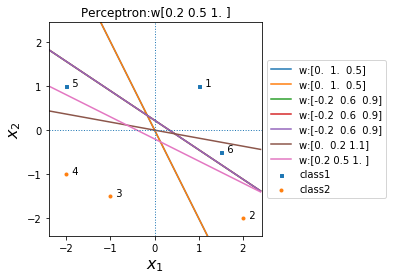

In [7]:
import joy
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0, -1.5], [-2.0, -1.0], [-2.0,1.0], [1.5, -0.5]]) 
X = np.c_[ np.ones(len(x)), x ]
y = np.array([1, -1, -1, -1, 1, 1])
w = np.array([0.0, 1.0, 0.5])
w_ = np.array([w])                            # an array of w's 

eta = 0.1
for i, (xi, yi) in enumerate(zip(X, y)):
    z = np.dot(xi, w)                          # Compute net input, same as np.dot(w.T, x)
    yhat = np.where(z >= 0.0, 1, -1)          # Apply step func and get output
    delta = eta * (yi - yhat) * xi            # Compute delta    
    w += delta                                # Adjust weight
    w_ = np.vstack([w_, w])   

    print('{} z={}, \t y:{}, yhat:{}, delta{}, w:{}'
          .format(i+1, np.round(z,2), yi, yhat, delta, w))

print('w = ', w)
print('w_ = ', w_)
joy.plot_xyw(X, y, w_, X0=True, annotate=True)

------------------------


## 학습 정리
- 퍼셉트론 알고리즘
- 퍼셉트론 가중치 계산
- 퍼섭트론 학습 전체 과정
- 퍼셉트론 알고리즘의 한계
- 퍼셉트론 예제

----------